In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

import xclimate as xclim

# Quantifying the impact of coastal gridcells on latent heat flux from CLM vs. CAM

In [6]:
a_atm_fhist = xr.open_dataset(
    "/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/" \
    "f.e21.FHIST_BGC.f19_f19_mg17.CMIP6-AMIP-2deg.001/atm/proc/tseries/month_1/" \
    "f.e21.FHIST_BGC.f19_f19_mg17.CMIP6-AMIP-2deg.001.cam.h0.AREA.200001-201412.nc",
    decode_timedelta=False)["AREA"].isel(time=0).fillna(0) / 1e6
a_atm_fhist.attrs["units"] = "km^2"

lndgrid_fhist = xclim.load_coupled_fhist_ppe("EFLX_LH_TOT", "lnd", "month_1")[["area", "landfrac"]].isel(member=0).fillna(0)
lf_lnd_fhist = lndgrid_fhist.landfrac
a_lnd_fhist = lndgrid_fhist.area
la_lnd_fhist = a_lnd_fhist * lf_lnd_fhist

lf_lnd_rei_atm_fhist = lf_lnd_fhist.reindex(lat=a_atm_fhist.lat, lon=a_atm_fhist.lon, method="nearest", tolerance=1e-3)

a_atm_rei_lnd_fhist = a_atm_fhist.reindex(lat=a_lnd_fhist.lat, lon=a_lnd_fhist.lon, method="nearest", tolerance=1e-3)
a_lnd_rei_atm_fhist = a_lnd_fhist.reindex(lat=a_atm_fhist.lat, lon=a_atm_fhist.lon, method="nearest", tolerance=1e-3)

la_atm_fhist = a_atm_fhist * lf_lnd_fhist.reindex(lat=a_atm_fhist.lat, lon=a_atm_fhist.lon, method="nearest", tolerance=1e-3)
la_atm_rei_lnd_fhist = a_atm_rei_lnd_fhist * lf_lnd_fhist
la_lnd_rei_atm_fhist = la_lnd_fhist.reindex(lat=a_atm_fhist.lat, lon=a_atm_fhist.lon, method="nearest", tolerance=1e-3)

In [ ]:
a_atm_le = xclim.load_cesm2le("AREA", "atm", "month_1", "h0", keep_var_only=True)["AREA"].isel(member=0, time=0).fillna(0) / 1e6
a_atm_le.attrs["units"] = "km^2"

lndgrid_le = xclim.load_cesm2le("EFLX_LH_TOT", "lnd", "month_1", "h0")[["area", "landfrac"]].isel(member=0, time=0).fillna(0)
lf_lnd_le = lndgrid_le.landfrac
a_lnd_le = lndgrid_le.area
la_lnd_le = a_lnd_le * lf_lnd_le

lf_lnd_rei_atm_le = lf_lnd_le.reindex(lat=a_atm_le.lat, lon=a_atm_le.lon, method="nearest", tolerance=1e-3)

a_atm_rei_lnd_le = a_atm_le.reindex(lat=a_lnd_le.lat, lon=a_lnd_le.lon, method="nearest", tolerance=1e-3)
a_lnd_rei_atm_le = a_lnd_le.reindex(lat=a_atm_le.lat, lon=a_atm_le.lon, method="nearest", tolerance=1e-3)

la_atm_le = a_atm_le * lf_lnd_le.reindex(lat=a_atm_le.lat, lon=a_atm_le.lon, method="nearest", tolerance=1e-3)
la_atm_rei_lnd_le = a_atm_rei_lnd_le * lf_lnd_le
la_lnd_rei_atm_le = la_lnd_le.reindex(lat=a_atm_le.lat, lon=a_atm_le.lon, method="nearest", tolerance=1e-3)

/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/glade/u/home/bbuchovecky/mini

/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Text(0.5, 0.98, 'CESM2 LE')

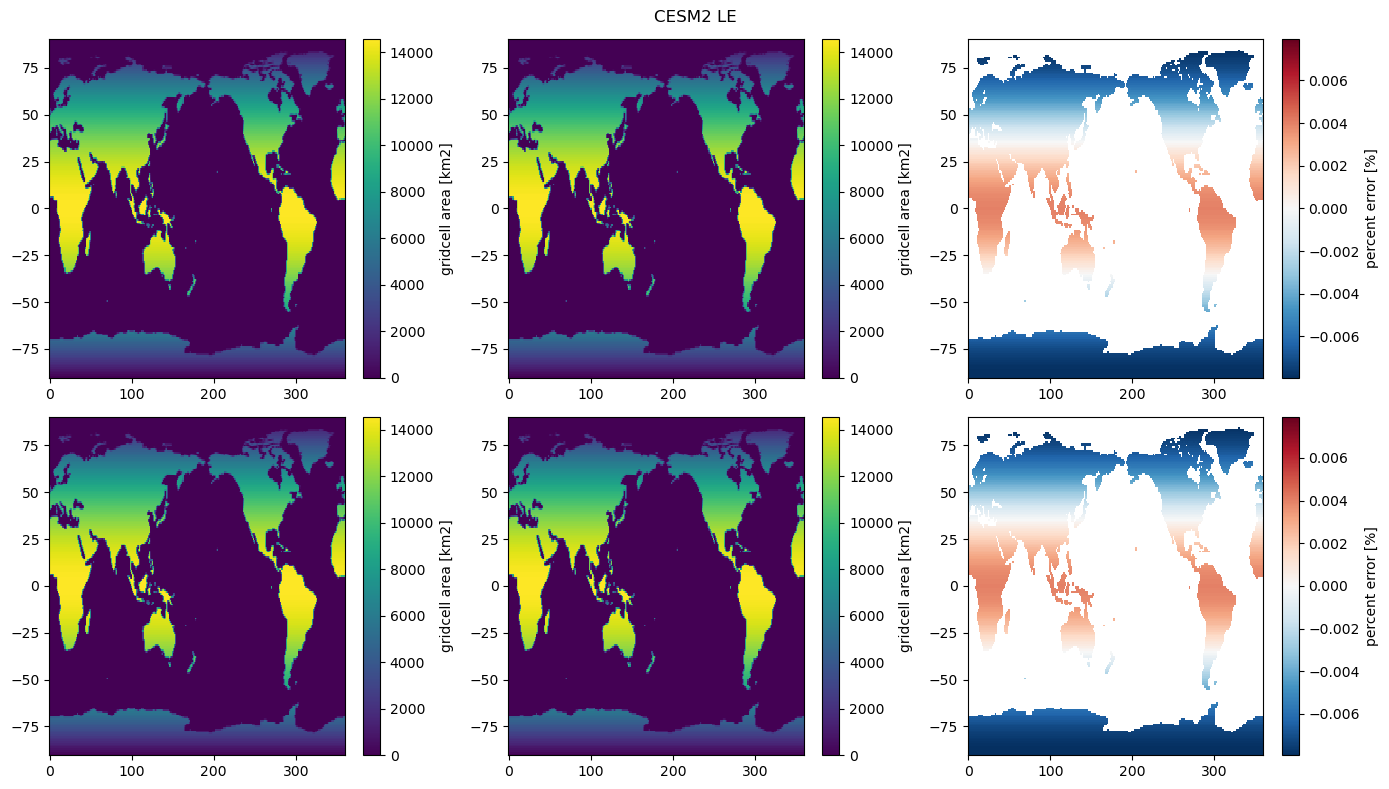

In [64]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8), layout="tight", dpi=100)
ax = axes.flatten()

la_lnd_le.plot(ax=ax[0], cbar_kwargs={"label": "gridcell area [km2]"}, add_labels=False)
la_atm_rei_lnd_le.plot(ax=ax[1], cbar_kwargs={"label": "gridcell area [km2]"}, add_labels=False)
((la_lnd_le - la_atm_rei_lnd_le) / la_lnd_le * 100).plot(ax=ax[2], cbar_kwargs={"label": "percent error [%]"}, add_labels=False)
la_lnd_rei_atm_le.plot(ax=ax[3], cbar_kwargs={"label": "gridcell area [km2]"}, add_labels=False)
la_atm_le.plot(ax=ax[4], cbar_kwargs={"label": "gridcell area [km2]"}, add_labels=False)
((la_lnd_rei_atm_le - la_atm_le) / la_atm_le * 100).plot(ax=ax[5], cbar_kwargs={"label": "percent error [%]"}, add_labels=False)

plt.suptitle("CESM2 LE")

Text(0.5, 0.98, 'FHIST PPE')

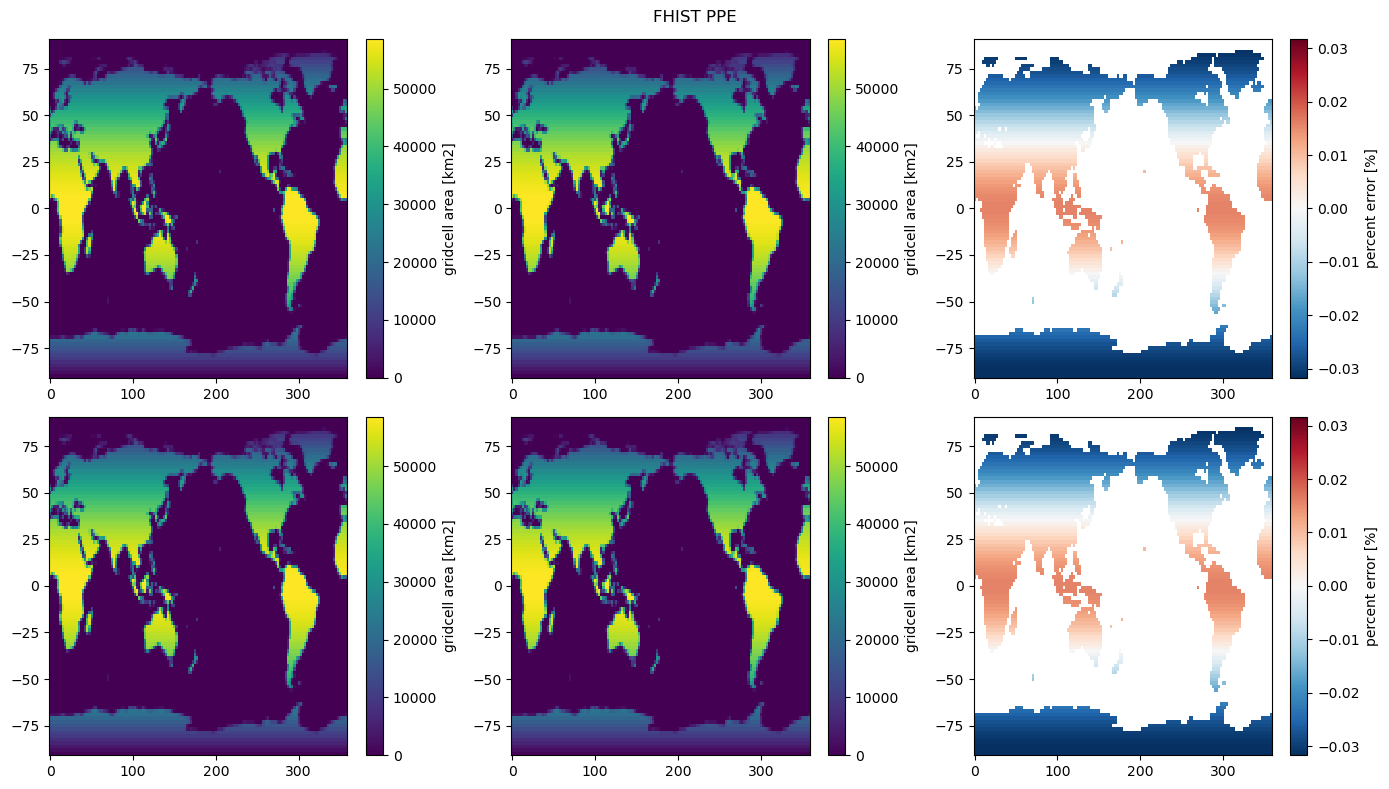

In [65]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8), layout="tight", dpi=100)
ax = axes.flatten()

la_lnd_fhist.plot(ax=ax[0], cbar_kwargs={"label": "gridcell area [km2]"}, add_labels=False)
la_atm_rei_lnd_fhist.plot(ax=ax[1], cbar_kwargs={"label": "gridcell area [km2]"}, add_labels=False)
((la_lnd_fhist - la_atm_rei_lnd_fhist) / la_lnd_fhist * 100).plot(ax=ax[2], cbar_kwargs={"label": "percent error [%]"}, add_labels=False)
la_lnd_rei_atm_fhist.plot(ax=ax[3], cbar_kwargs={"label": "gridcell area [km2]"}, add_labels=False)
la_atm_fhist.plot(ax=ax[4], cbar_kwargs={"label": "gridcell area [km2]"}, add_labels=False)
((la_lnd_rei_atm_fhist - la_atm_fhist) / la_atm_fhist * 100).plot(ax=ax[5], cbar_kwargs={"label": "percent error [%]"}, add_labels=False)

plt.suptitle("FHIST PPE")

In [35]:
variables = {
    "LHFLX": "atm",
    "EFLX_LH_TOT": "lnd",
}

fhist = {}
le_raw = {}
le_rei = {}
for v, gcomp in variables.items():
    print(v)
    fhist[v] = xclim.load_coupled_fhist_ppe(v, gcomp, "month_1", stream="h0", keep_var_only=True)[v]
    le_raw[v] = xclim.load_cesm2le(v, gcomp, "month_1", "h0", keep_var_only=True).sel(time=slice("1900-01", None))[v]

le_rei["LHFLX"] = le_raw["LHFLX"].reindex(lat=la_le.lat, lon=la_le.lon, method="nearest", tolerance=1e-3)
le_rei["EFLX_LH_TOT"] = le_raw["EFLX_LH_TOT"].reindex(lat=a_le.lat, lon=a_le.lon, method="nearest", tolerance=1e-3)

LHFLX


/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/glade/u/home/bbuchovecky/miniforge3/envs/cpl_ppe_co2/lib/python3.12/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/glade/u/home/bbuchovecky/mini

EFLX_LH_TOT


In [7]:
fhist = {}

fhist["ET_lnd"] = xclim.load_coupled_fhist_ppe("EFLX_LH_TOT", "lnd", "month_1", stream="h0", keep_var_only=True)["EFLX_LH_TOT"]
fhist["ET_lnd_rei_atm"] = fhist["ET_lnd"].reindex(lat=a_atm_fhist.lat, lon=a_atm_fhist.lon, method="nearest", tolerance=1e-3)

fhist["LH_atm"] = xclim.load_coupled_fhist_ppe("LHFLX", "atm", "month_1", stream="h0", keep_var_only=True)["LHFLX"]
fhist["LH_atm_rei_lnd"] = fhist["LH_atm"].reindex(lat=a_lnd_fhist.lat, lon=a_lnd_fhist.lon, method="nearest", tolerance=1e-3)


# le = {}

# le["ET_lnd"] = xclim.load_cesm2le("EFLX_LH_TOT", "lnd", "month_1", stream="h0", keep_var_only=True)["EFLX_LH_TOT"]
# le["ET_lnd_rei_atm"] = le["ET_lnd"].reindex(lat=a_atm_le.lat, lon=a_atm_le.lon, method="nearest", tolerance=1e-3)

# le["LH_atm"] = xclim.load_cesm2le("LHFLX", "atm", "month_1", stream="h0", keep_var_only=True)["LHFLX"]
# le["LH_atm_rei_lnd"] = le["LH_atm"].reindex(lat=a_lnd_le.lat, lon=a_lnd_le.lon, method="nearest", tolerance=1e-3)

Text(0.5, 0.98, 'time = 1950-01-01 00:00:00, member = 0')

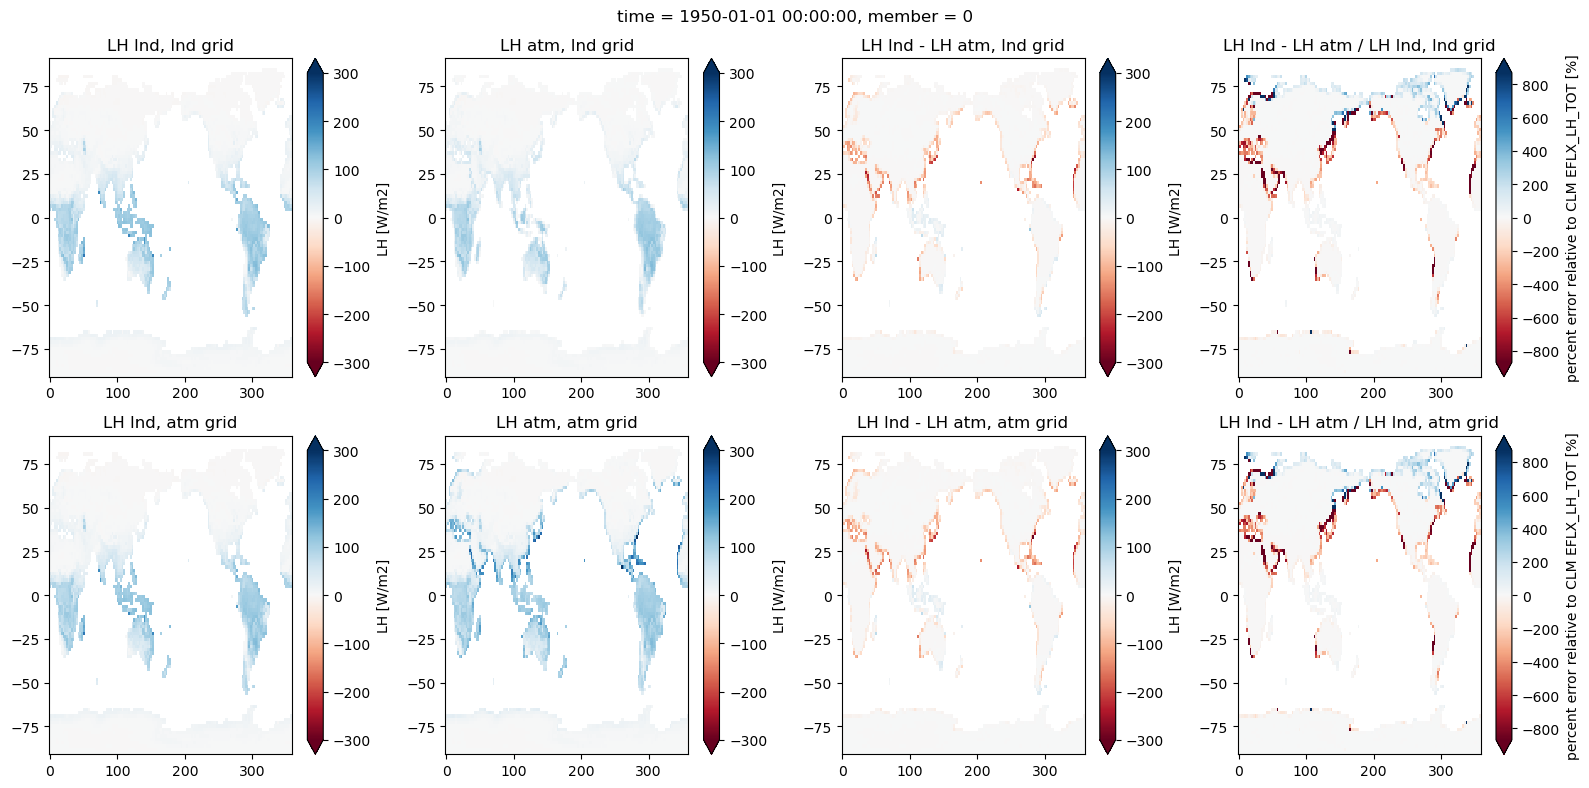

In [50]:
itime = 0
imember = 0

cmap = "RdBu"
vabs = 300
vmin = -vabs
vmax = vabs

fig, axes = plt.subplots(2, 4, figsize=(16, 8), layout="tight")
ax = axes.flatten()

(fhist["ET_lnd"].isel(member=imember, time=itime)).plot(ax=ax[0], vmin=vmin, vmax=vmax, cmap=cmap, extend="both", add_labels=False, cbar_kwargs={"label": "LH [W/m2]"})
(fhist["LH_atm_rei_lnd"].isel(member=imember, time=itime) * lf_lnd_fhist).where(la_lnd_fhist>0).plot(ax=ax[1], vmin=vmin, vmax=vmax, cmap=cmap, extend="both", add_labels=False, cbar_kwargs={"label": "LH [W/m2]"})
((fhist["ET_lnd"].isel(member=imember, time=itime) - fhist["LH_atm_rei_lnd"].isel(member=imember, time=itime))).plot(ax=ax[2], vmin=vmin, vmax=vmax, cmap=cmap, extend="both", add_labels=False, cbar_kwargs={"label": "LH [W/m2]"})
((fhist["ET_lnd"].isel(member=imember, time=itime) - fhist["LH_atm_rei_lnd"].isel(member=imember, time=itime)) / fhist["ET_lnd"].isel(member=imember, time=itime) * 100).plot(ax=ax[3], robust=True, cmap=cmap, extend="both", add_labels=False, cbar_kwargs={"label": "percent error relative to CLM EFLX_LH_TOT [%]"})

ax[0].set_title("LH lnd, lnd grid")
ax[1].set_title("LH atm, lnd grid")
ax[2].set_title("LH lnd - LH atm, lnd grid")
ax[3].set_title("LH lnd - LH atm / LH lnd, lnd grid")


(fhist["ET_lnd_rei_atm"].isel(member=imember, time=itime)).plot(ax=ax[4], vmin=vmin, vmax=vmax, cmap=cmap, extend="both", add_labels=False, cbar_kwargs={"label": "LH [W/m2]"})
(fhist["LH_atm"].where(la_atm_fhist>0).isel(member=imember, time=itime)).plot(ax=ax[5], vmin=vmin, vmax=vmax, cmap=cmap, extend="both", add_labels=False, cbar_kwargs={"label": "LH [W/m2]"})
((fhist["ET_lnd_rei_atm"].isel(member=imember, time=itime) - fhist["LH_atm"].isel(member=imember, time=itime))).plot(ax=ax[6], vmin=vmin, vmax=vmax, cmap=cmap, extend="both", add_labels=False, cbar_kwargs={"label": "LH [W/m2]"})
((fhist["ET_lnd_rei_atm"].isel(member=imember, time=itime) - fhist["LH_atm"].isel(member=imember, time=itime)) / fhist["ET_lnd_rei_atm"].isel(member=imember, time=itime) * 100).plot(ax=ax[7], robust=True, cmap=cmap, extend="both", add_labels=False, cbar_kwargs={"label": "percent error relative to CLM EFLX_LH_TOT [%]"})

ax[4].set_title("LH lnd, atm grid")
ax[5].set_title("LH atm, atm grid")
ax[6].set_title("LH lnd - LH atm, atm grid")
ax[7].set_title("LH lnd - LH atm / LH lnd, atm grid")

fig.suptitle(f'time = {fhist["ET_lnd"].time.isel(time=itime).item()}, member = {fhist["ET_lnd"].member.isel(member=imember).item()}')

In [ ]:
print(
    "global land mean LH from EFLX_LH_TOT (CLM): " \
    f"{(fhist["ET_lnd"].isel(member=imember, time=itime)).weighted(la_lnd_fhist).mean(dim=["lat", "lon"]).values:0.3f}"
)

global land mean LH from EFLX_LH_TOT (CLM): 30.325


In [56]:
print(
    "global land mean LH from LHFLX (CAM): " \
    f"{(fhist["LH_atm_rei_lnd"].isel(member=imember, time=itime)).weighted(la_lnd_fhist).mean(dim=["lat", "lon"]).values:0.3f}"
)

global land mean LH from LHFLX (CAM): 33.690


In [59]:
print(
    "global mean EFLX_LH_TOT (CLM) - LHFLX (CAM): " \
    f"{((fhist["ET_lnd"].isel(member=imember, time=itime) - fhist["LH_atm_rei_lnd"].isel(member=imember, time=itime))).weighted(la_lnd_fhist).mean(dim=["lat", "lon"]).values:0.3f}"
)

global mean EFLX_LH_TOT (CLM) - LHFLX (CAM): -3.364
